In [8]:
%load_ext autoreload
%autoreload

import sys

sys.path.append("../../../GaussNeuro")
import gaussneuro as lib

sys.path.append("../fit/")
import synthetic

import equinox as eqx
import jax
import jax.numpy as jnp
import jax.random as jr
import numpy as np


import analyze_synthetic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
jax.config.update('jax_platform_name', 'cpu')
#jax.config.update("jax_enable_x64", True)

seed = 123
rng = np.random.default_rng(seed)
prng_state = jr.PRNGKey(seed)
batch_size = 10000

## Data

In [3]:
### data ###
data_path = "../../data/synthetic/"
session_name = "syn_data_seed123"
max_ISI_order = 4

select_fracs = [0.0, 1.0]

dataset_dict = synthetic.spikes_dataset(session_name, data_path, max_ISI_order, select_fracs)

#covariates = dataset_dict['covariates']
#x_t, y_t = covariates['x'], covariates['y']


In [4]:
ISI_order = 4
reg_config_names = [
    'syn_data_seed123ISI4sel0.0to1.0_PP-log__factorized_gp-16-1000_X[x-y]_Z[]', 
    'syn_data_seed123ISI4sel0.0to1.0_isi4__nonparam_pp_gp-48-matern32-1000-1._X[x-y]_Z[]'.format(ISI_order), 
]

tuning_model_name = reg_config_names[-1]

checkpoint_dir = '../checkpoint/'

In [7]:
regression_dict = analyze_synthetic.regression(
    checkpoint_dir, reg_config_names, dataset_dict, rng, prng_state, batch_size
)

Analyzing regression for syn_data_seed123ISI4sel0.0to1.0_PP-log__factorized_gp-16-1000_X[x-y]_Z[]...
Analyzing regression for syn_data_seed123ISI4sel0.0to1.0_isi4__nonparam_pp_gp-48-matern32-1000-1._X[x-y]_Z[]...


In [9]:
tuning_dict = analyze_synthetic.tuning(
    checkpoint_dir, tuning_model_name, dataset_dict, rng, prng_state, batch_size
)

Analyzing tuning for syn_data_seed123ISI4sel0.0to1.0_isi4__nonparam_pp_gp-48-matern32-1000-1._X[x-y]_Z[]...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
import matplotlib.pyplot as plt
plt.style.use(['../plots/paper.mplstyle'])

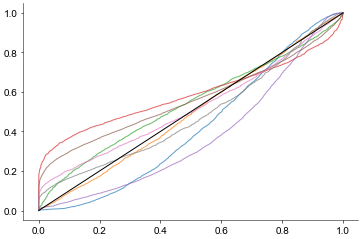

In [13]:
dd = regression_dict['syn_data_seed123ISI4sel0.0to1.0_PP-log__factorized_gp-16-1000_X[x-y]_Z[]']
sort_cdfs = dd['KS_quantiles']

for n in range(len(sort_cdfs)):
    if sort_cdfs[n] is not None:
        plt.plot(np.linspace(0., 1., len(sort_cdfs[n])), sort_cdfs[n], alpha=0.7)
plt.plot(np.linspace(0., 1., 100), np.linspace(0., 1., 100), c='k')
plt.show()

In [32]:
p = 0.004
spikes_at = rng.binomial(1, p, size=(1000,))

spikes_at.sum()

5

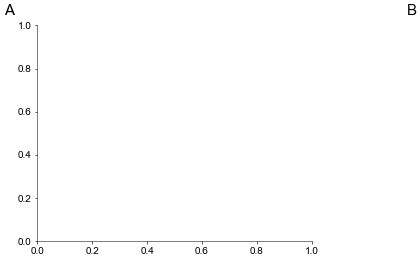

In [16]:
fig = plt.figure(figsize=(8, 3))
fig.text(-0.05, 1.05, 'A', fontsize=15, ha='center')
fig.text(0.65, 1.05, 'B', fontsize=15, ha='center')



widths = [1, 1]
heights = [1]
spec = fig.add_gridspec(ncols=len(widths), nrows=len(heights), width_ratios=widths, 
                        height_ratios=heights, top=1.0, bottom=0.0, 
                        left=0.0, right=1., wspace=0.1)

ax = fig.add_subplot(spec[0, 0])





plt.show()

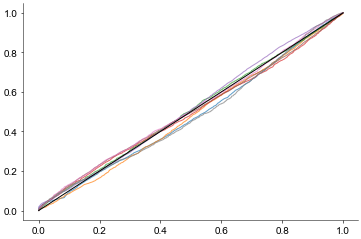

In [15]:
dd = regression_dict['syn_data_seed123ISI4sel0.0to1.0_isi4__nonparam_pp_gp-48-matern32-1000-1._X[x-y]_Z[]']
sort_cdfs = dd['KS_quantiles']

for n in range(len(sort_cdfs)):
    if sort_cdfs[n] is not None:
        plt.plot(np.linspace(0., 1., len(sort_cdfs[n])), sort_cdfs[n], alpha=0.7)
plt.plot(np.linspace(0., 1., 100), np.linspace(0., 1., 100), c='k')
plt.show()

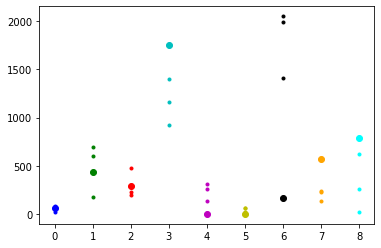

In [42]:
ls = model.obs_model.gp.kernel.kernels[1].kernels[0].lengthscale[:, :3] * warp_tau[:, None]
tls = model.obs_model.gp.kernel.kernels[0].lengthscale[:, 0] * warp_tau
cs = [
    'b',
    'g',
    'r',
    'c',
    'm',
    'y',
    'k',
    'orange',
    'cyan'
]

for n in range(9):
    lens = ls[n]
    tlen = tls[n]
    plt.scatter(n*np.ones_like(lens), lens, marker='.', c=cs[n])
    plt.scatter(n*np.ones(1), tlen, marker='o', c=cs[n])
    
plt.show()